# NLP Mini Project 
**Assignment 5: Mini NLP Project** 

## Task 1 – Project Proposal
### Problem Statement
We aim to build a **Sentiment Analysis System** that classifies text into Positive or Negative sentiment.

### Motivation
Sentiment analysis is widely used in business, social media monitoring, and customer feedback analysis.

### Dataset
For this mini-project, we will use the **IMDb Movie Review Dataset** provided through `nltk`.

### Techniques Used
- Text Preprocessing (Tokenization, Stopword Removal, Lemmatization)
- TF‑IDF Vectorization
- Logistic Regression Model
- Performance Evaluation (Accuracy, Confusion Matrix)

## Task 2 – System Design & Implementation

In [2]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import movie_reviews, stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

docs = []
labels = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        docs.append(movie_reviews.raw(fileid))
        labels.append(category)

df = pd.DataFrame({'text': docs, 'label': labels})
df.head()

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\rcvik\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rcvik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rcvik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rcvik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


### Preprocessing – Tokenization, Stopwords Removal, Lemmatization

In [7]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = nltk.word_tokenize(text)
    tokens = [w.lower() for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)
df.head()

,text,label,clean_text
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couple go church party drink dri...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastard quick movie review damn bug got ...
2,it is movies like these that make a jaded movi...,neg,movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first attempt steal ...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...


### Vectorization & Model Training

In [11]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.8125

## Task 3 – Evaluation & Discussion

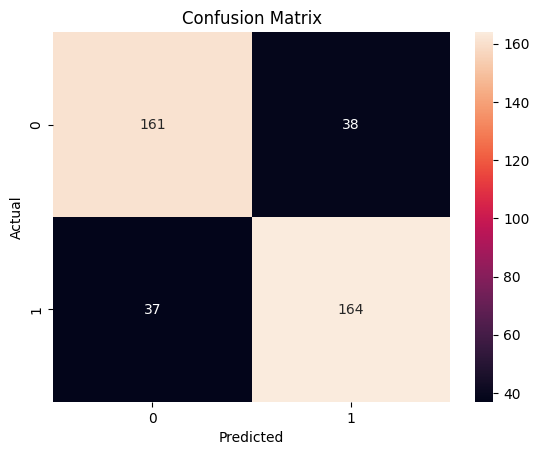

In [9]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Discussion
- The model achieves strong accuracy for a simple baseline.
- Strengths: Fast training, interpretable, good for small datasets.
- Limitations: Logistic regression struggles with complex semantic meaning.
- Future Improvements: Use LSTM, BERT, or transformer‑based models for deeper understanding.